<a href="https://colab.research.google.com/github/klein-mask/signate/blob/main/competitions/no_413/gb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = '/content/drive/MyDrive/Colab Notebooks/no_413'

In [3]:
import pandas as pd
train = pd.read_csv(f'{project_path}/data/train.csv')
# test  = pd.read_csv(f'{project_path}/data/test.csv')

In [4]:
train.head(3)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0


In [5]:
x = train.drop('Y', axis=1)
y = train['Y']

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           11900 non-null  int64 
 1   age             11900 non-null  int64 
 2   workclass       11900 non-null  object
 3   fnlwgt          11900 non-null  int64 
 4   education       11900 non-null  object
 5   education-num   11900 non-null  int64 
 6   marital-status  11900 non-null  object
 7   occupation      11900 non-null  object
 8   relationship    11900 non-null  object
 9   race            11900 non-null  object
 10  sex             11900 non-null  object
 11  native-country  11900 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
x = x.drop('index', axis=1)

In [8]:
x['workclass'].value_counts(sort=True).index[0]

'Private'

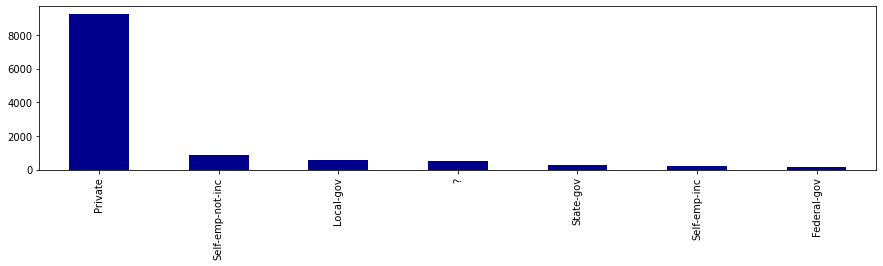

In [9]:
x['workclass'].value_counts().plot.bar(figsize=(15, 3), color='darkblue')

In [10]:
# ?はいっそ明らかに多いprivateにする
max_workclass = x['workclass'].value_counts(sort=True).index[0]
x['workclass'] = x['workclass'].replace('?', max_workclass)

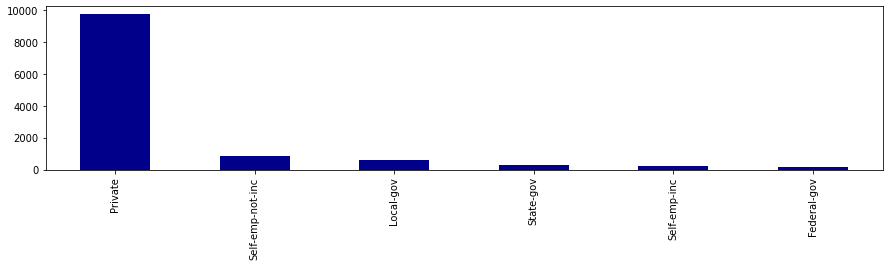

In [11]:
x['workclass'].value_counts().plot.bar(figsize=(15, 3), color='darkblue')


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             11900 non-null  int64 
 1   workclass       11900 non-null  object
 2   fnlwgt          11900 non-null  int64 
 3   education       11900 non-null  object
 4   education-num   11900 non-null  int64 
 5   marital-status  11900 non-null  object
 6   occupation      11900 non-null  object
 7   relationship    11900 non-null  object
 8   race            11900 non-null  object
 9   sex             11900 non-null  object
 10  native-country  11900 non-null  object
dtypes: int64(3), object(8)
memory usage: 1022.8+ KB


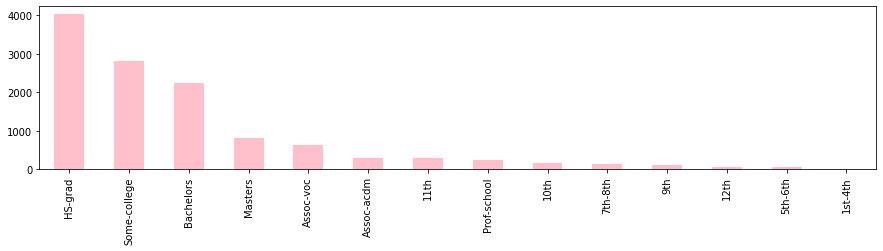

In [13]:
x['education'].value_counts().plot.bar(figsize=(15, 3), color='pink')

In [14]:
x['education'].value_counts()

HS-grad         4034
Some-college    2813
Bachelors       2235
Masters          805
Assoc-voc        641
Assoc-acdm       305
11th             302
Prof-school      234
10th             173
7th-8th          128
9th              107
12th              71
5th-6th           51
1st-4th            1
Name: education, dtype: int64

- HS-grad: 高校卒業
- Some-college: 大学中退
- Bachelors: 学士号
- Masters：修士号
- 

In [15]:
x['marital-status'].value_counts()

Married-civ-spouse    6004
Never-married         3392
Divorced              1911
Separated              312
Widowed                281
Name: marital-status, dtype: int64

In [16]:
x['relationship'].value_counts()

Husband           5400
Not-in-family     2502
Own-child         2017
Unmarried         1249
Wife               529
Other-relative     203
Name: relationship, dtype: int64

In [17]:
x['sex'].value_counts()

Male      7949
Female    3951
Name: sex, dtype: int64

In [18]:
sex_mapping = {
    'Male': 0,
    'Female': 1
}
x['sex'] = x['sex'].map(sex_mapping)

In [19]:
x['sex'].value_counts()

0    7949
1    3951
Name: sex, dtype: int64

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             11900 non-null  int64 
 1   workclass       11900 non-null  object
 2   fnlwgt          11900 non-null  int64 
 3   education       11900 non-null  object
 4   education-num   11900 non-null  int64 
 5   marital-status  11900 non-null  object
 6   occupation      11900 non-null  object
 7   relationship    11900 non-null  object
 8   race            11900 non-null  object
 9   sex             11900 non-null  int64 
 10  native-country  11900 non-null  object
dtypes: int64(4), object(7)
memory usage: 1022.8+ KB


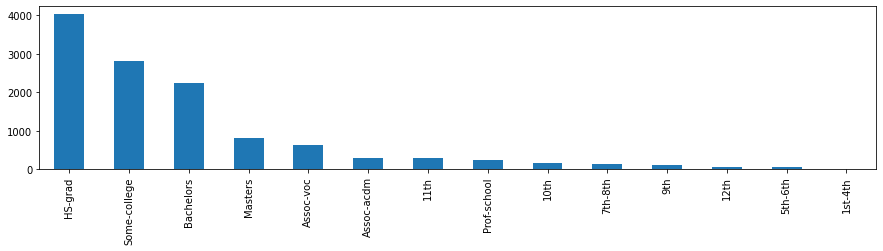

In [21]:
x['education'].value_counts().plot.bar(figsize=(15, 3))

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(x['education'])
x['education'] = le.transform(x['education'])

In [23]:
x['education'].value_counts()

10    4034
13    2813
9     2235
11     805
8      641
7      305
1      302
12     234
0      173
5      128
6      107
2       71
4       51
3        1
Name: education, dtype: int64

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             11900 non-null  int64 
 1   workclass       11900 non-null  object
 2   fnlwgt          11900 non-null  int64 
 3   education       11900 non-null  int64 
 4   education-num   11900 non-null  int64 
 5   marital-status  11900 non-null  object
 6   occupation      11900 non-null  object
 7   relationship    11900 non-null  object
 8   race            11900 non-null  object
 9   sex             11900 non-null  int64 
 10  native-country  11900 non-null  object
dtypes: int64(5), object(6)
memory usage: 1022.8+ KB


In [25]:
x['marital-status'].value_counts()

Married-civ-spouse    6004
Never-married         3392
Divorced              1911
Separated              312
Widowed                281
Name: marital-status, dtype: int64

In [26]:
x['relationship'].value_counts()

Husband           5400
Not-in-family     2502
Own-child         2017
Unmarried         1249
Wife               529
Other-relative     203
Name: relationship, dtype: int64

In [27]:
x['native-country'].value_counts()

United-States    11869
Mexico              25
Philippines          6
Name: native-country, dtype: int64

In [28]:
x = x.drop('native-country', axis=1)

In [29]:
x['occupation'].value_counts()
x['occupation'] = x['occupation'].replace('?', 'None')

In [30]:
x['race'].value_counts()

White                 10978
Black                   677
Asian-Pac-Islander      245
Name: race, dtype: int64

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             11900 non-null  int64 
 1   workclass       11900 non-null  object
 2   fnlwgt          11900 non-null  int64 
 3   education       11900 non-null  int64 
 4   education-num   11900 non-null  int64 
 5   marital-status  11900 non-null  object
 6   occupation      11900 non-null  object
 7   relationship    11900 non-null  object
 8   race            11900 non-null  object
 9   sex             11900 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 929.8+ KB


In [32]:
ohe_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
x_ohe = pd.get_dummies(x, columns=ohe_columns)

In [33]:
x_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                11900 non-null  int64
 1   fnlwgt                             11900 non-null  int64
 2   education                          11900 non-null  int64
 3   education-num                      11900 non-null  int64
 4   sex                                11900 non-null  int64
 5   workclass_Federal-gov              11900 non-null  uint8
 6   workclass_Local-gov                11900 non-null  uint8
 7   workclass_Private                  11900 non-null  uint8
 8   workclass_Self-emp-inc             11900 non-null  uint8
 9   workclass_Self-emp-not-inc         11900 non-null  uint8
 10  workclass_State-gov                11900 non-null  uint8
 11  marital-status_Divorced            11900 non-null  uint8
 12  marital-status_Mar

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
x_scaled = StandardScaler().fit_transform(x_ohe)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [37]:
import lightgbm as lgb

lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test)

lgb_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary'
}


lgb_results = {}

model = lgb.train(
    params=lgb_params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['Train', 'Test'],
    num_boost_round=100,
    early_stopping_rounds=10,
    evals_result=lgb_results
)

[1]	Train's binary_logloss: 0.529232	Test's binary_logloss: 0.528213
Training until validation scores don't improve for 10 rounds.
[2]	Train's binary_logloss: 0.498134	Test's binary_logloss: 0.498509
[3]	Train's binary_logloss: 0.47352	Test's binary_logloss: 0.47493
[4]	Train's binary_logloss: 0.453022	Test's binary_logloss: 0.455226
[5]	Train's binary_logloss: 0.435839	Test's binary_logloss: 0.43892
[6]	Train's binary_logloss: 0.421311	Test's binary_logloss: 0.424948
[7]	Train's binary_logloss: 0.408981	Test's binary_logloss: 0.413278
[8]	Train's binary_logloss: 0.3984	Test's binary_logloss: 0.403539
[9]	Train's binary_logloss: 0.389123	Test's binary_logloss: 0.395324
[10]	Train's binary_logloss: 0.381343	Test's binary_logloss: 0.388059
[11]	Train's binary_logloss: 0.374376	Test's binary_logloss: 0.381936
[12]	Train's binary_logloss: 0.368353	Test's binary_logloss: 0.376748
[13]	Train's binary_logloss: 0.363088	Test's binary_logloss: 0.3722
[14]	Train's binary_logloss: 0.358382	Test's

In [43]:
import numpy as np
print(np.min(lgb_results['Train']['binary_logloss']))
print(np.min(lgb_results['Test']['binary_logloss']))
best_iteration = model.best_iteration
print(best_iteration)

0.3074408505477516
0.34064725310784655
40


In [44]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

In [45]:
y_pred

array([0.05807381, 0.46130942, 0.01579358, ..., 0.12843733, 0.03029955,
       0.02972164])

In [47]:
y_pred = [0 if i < 0.5 else 1 for i in y_pred]